In [1]:
import os

import numpy as np
import cv2
import torch
import matplotlib.pyplot as plt
from PIL import Image
import pickle
from trimesh import Trimesh

import image
from utils import get_integer_segments, plot_region_numbers, triangulate_segments

In [2]:
with open('../data/kfs_moge_realsense/kf_1.pkl', 'rb') as file:
    data = pickle.load(file)
image_raw = data['state_dict']['image_raw'].cpu().permute(1,2,0)
sp_regions = data['state_dict']['sp_regions'].cpu().numpy()

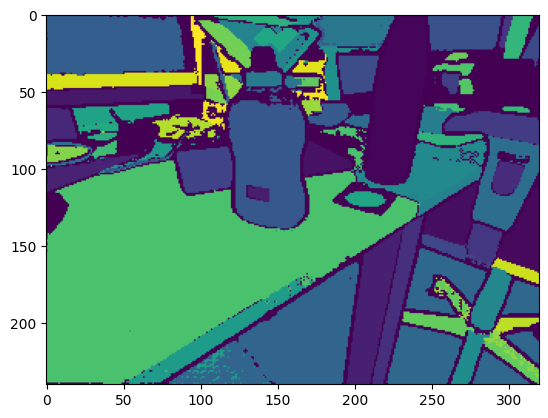

In [3]:
integer_segments = get_integer_segments(sp_regions)
plt.imshow(integer_segments)

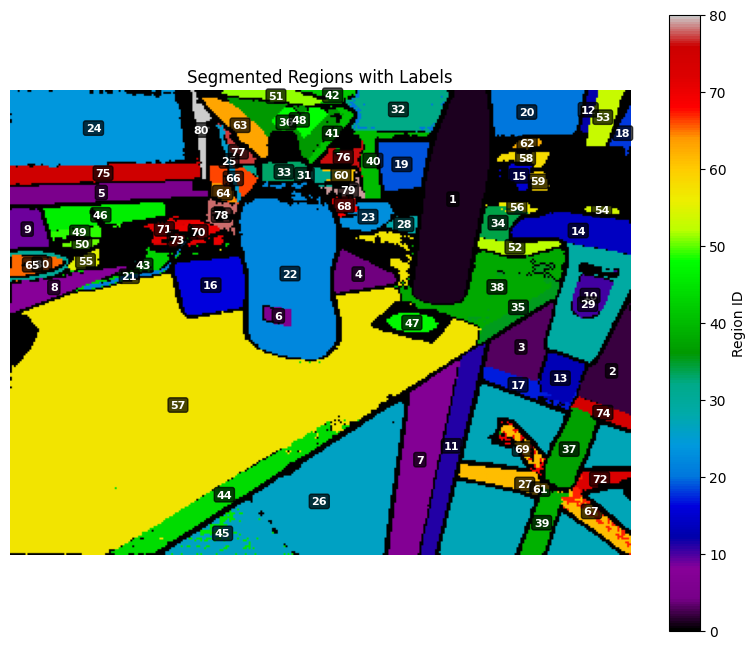

In [4]:
plot_region_numbers(integer_segments)

In [5]:
verts = data['state_dict']['pointmap'].cpu().reshape(-1, 3)
tris = triangulate_segments(verts, integer_segments)

In [6]:
all_tris = [tri for trise in tris for tri in trise]
mesh = Trimesh(vertices=verts, faces=all_tris)
meshes = [Trimesh(vertices=verts, faces=individual_tris) for individual_tris in tris]

In [7]:
mesh.show()

In [8]:
meshes[0].show()